<a href="https://colab.research.google.com/github/suraj2906/ObjectDetection/blob/main/YOLOObjectDetectionWithComments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yolo = cv2.dnn.readNet("./drive/MyDrive/Colab Notebooks/YOLO/yolov3.weights", "./drive/MyDrive/Colab Notebooks/YOLO/yolov3.cfg")

In [3]:
classes = []

with open("/content/drive/MyDrive/Colab Notebooks/YOLO/coco.names", 'r') as f:
  classes = f.read().splitlines()

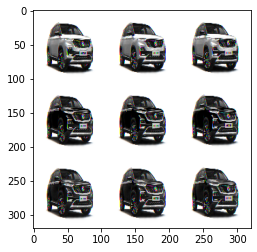

In [4]:
img = cv2.imread("./drive/MyDrive/Colab Notebooks/YOLO/car.jpeg")
#Creates Groups of similar pixels -> takes args of img, scalefactor, size, 
#mean subtraction value, swapRB because openCV has images in BGR, and crop
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)
blob.shape
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [6]:
#Giving the blob as input to the Neural Network
yolo.setInput(blob)

In [8]:
 #Gives final layers 82, 94, 106 in the YOLO Neural Network 
 #where the image is split into (size/32)^2x255,  (size/16)^2x255, and (size/8)^2x255 feature maps  
output_layer_name = yolo.getUnconnectedOutLayersNames()
#performs a forward pass with the given Layers and gives us the bounding boxes
layeroutput = yolo.forward(output_layer_name)

In [16]:
boxes = []
confidences = []
class_ids = []
width=img.shape[1]
height=img.shape[0]
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)
      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      

In [17]:
len(boxes)

1

In [22]:
#Performs NON MAX Suppression to eliminate redundant bounding boxes
#Arguments -> boxes, confidences, confThreshold, nmsThreshold (intersection over union)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [23]:
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [24]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x,y), (x+w, y+h), color, 4)
  cv2.putText(img, label+" "+confi, (x,y-20), font, 3, color, 2)

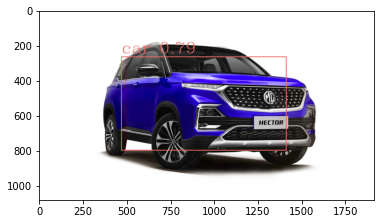

In [25]:
plt.imshow(img)